In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
import sys
reload(sys)
sys.setdefaultencoding("utf-8")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

# Some plots

In [2]:
df_train = pd.read_csv("train.csv")
df_train["outcome"] = df_train["outcome"].astype(int) 
df_bids = pd.read_csv("bids.csv")

In [3]:
print("Number of bots vs humans : ", df_train[df_train["outcome"]==1.].shape[0],len(df_train))

In [4]:
df_train.head()

,bidder_id,payment_account,address,outcome
0,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0
1,624f258b49e77713fc34034560f93fb3hu3jo,a3d2de7675556553a5f08e4c88d2c228v1sga,ae87054e5a97a8f840a3991d12611fdcrfbq3,0
2,1c5f4fc669099bfbfac515cd26997bd12ruaj,a3d2de7675556553a5f08e4c88d2c2280cybl,92520288b50f03907041887884ba49c0cl0pd,0
3,4bee9aba2abda51bf43d639013d6efe12iycd,51d80e233f7b6a7dfdee484a3c120f3b2ita8,4cb9717c8ad7e88a9a284989dd79b98dbevyi,0
4,4ab12bc61c82ddd9c2d65e60555808acqgos1,a3d2de7675556553a5f08e4c88d2c22857ddh,2a96c3ce94b3be921e0296097b88b56a7x1ji,0


In [5]:
df_bids.head()

,bid_id,bidder_id,auction,merchandise,device,time,country,ip,url
0,0,8dac2b259fd1c6d1120e519fb1ac14fbqvax8,ewmzr,jewelry,phone0,9759243157894736,us,69.166.231.58,vasstdc27m7nks3
1,1,668d393e858e8126275433046bbd35c6tywop,aeqok,furniture,phone1,9759243157894736,in,50.201.125.84,jmqlhflrzwuay9c
2,2,aa5f360084278b35d746fa6af3a7a1a5ra3xe,wa00e,home goods,phone2,9759243157894736,py,112.54.208.157,vasstdc27m7nks3
3,3,3939ac3ef7d472a59a9c5f893dd3e39fh9ofi,jefix,jewelry,phone4,9759243157894736,in,18.99.175.133,vasstdc27m7nks3
4,4,8393c48eaf4b8fa96886edc7cf27b372dsibi,jefix,jewelry,phone5,9759243157894736,in,145.138.5.37,vasstdc27m7nks3


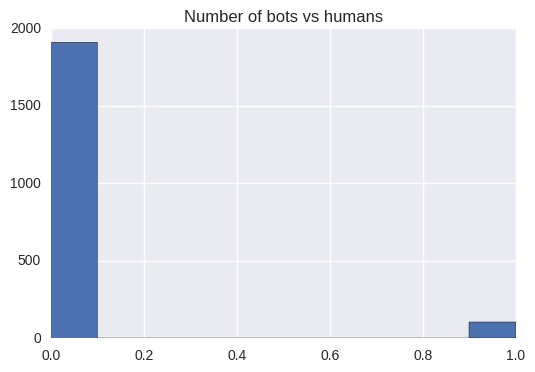

In [6]:
plt.figure()
df_train["outcome"].hist()
plt.title("Number of bots vs humans")
plt.show()

# Plot for the bids

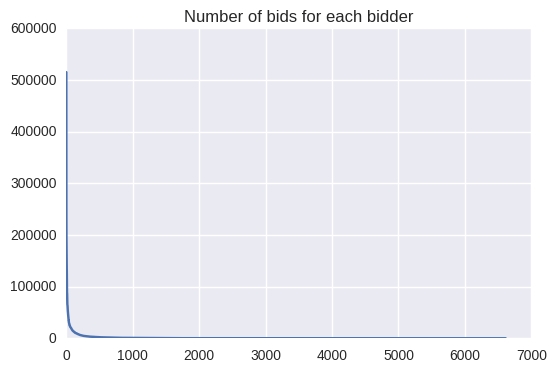

count      6614.000000
mean       1157.595101
std        9593.019312
min           1.000000
25%           3.000000
50%          18.000000
75%         187.000000
max      515033.000000
Name: bidder_id, dtype: float64

In [7]:
occurences = df_bids["bidder_id"].value_counts()
plt.plot(range(len(occurences)),occurences)
plt.title("Number of bids for each bidder")
plt.show()
occurences.describe()

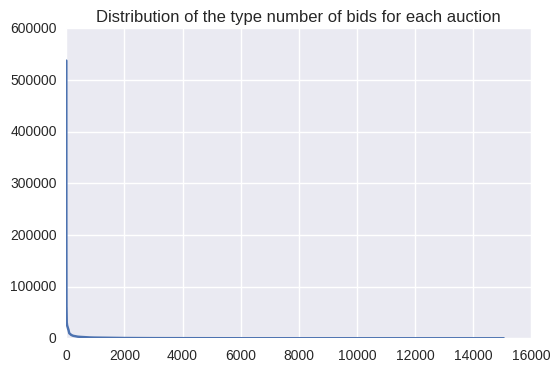

count     15051.000000
mean        508.692711
std        5214.089262
min           1.000000
25%           7.000000
50%          38.000000
75%         197.000000
max      537347.000000
Name: auction, dtype: float64

In [8]:
occurences = df_bids["auction"].value_counts()
plt.plot(range(len(occurences)),occurences)
plt.title("Distribution of the type number of bids for each auction")
plt.show()
occurences.describe()

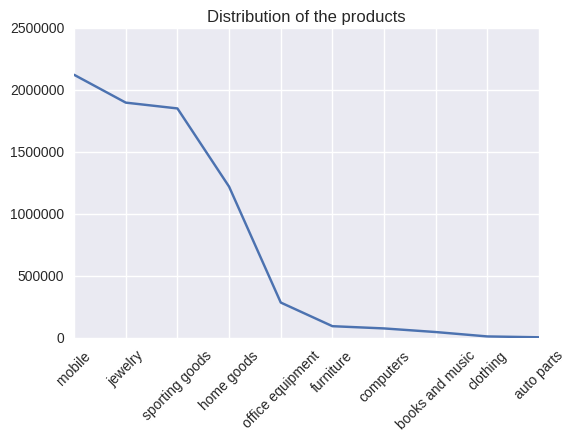

count    1.000000e+01
mean     7.656334e+05
std      9.019901e+05
min      9.757000e+03
25%      5.922675e+04
50%      1.945095e+05
75%      1.697464e+06
max      2.126587e+06
Name: merchandise, dtype: float64

In [9]:
occurences = df_bids["merchandise"].value_counts()
plt.plot(range(len(occurences)),occurences)
plt.xticks(range(len(occurences.keys())),occurences.keys(),rotation=45)
plt.title("Distribution of the products")
plt.show()
occurences.describe()

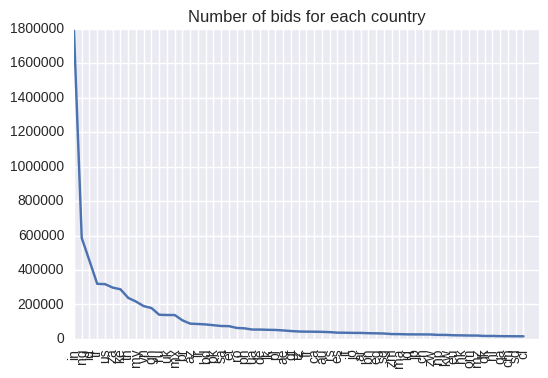

count    5.900000e+01
mean     1.212166e+05
std      2.487225e+05
min      1.509500e+04
25%      2.626350e+04
50%      4.305100e+04
75%      9.813550e+04
max      1.788731e+06
Name: country, dtype: float64

In [10]:
#show only the country with a number of bids >15000
occurences = df_bids["country"].value_counts()
occurences = occurences[occurences>15000]
plt.plot(range(len(occurences)),occurences)
plt.xticks(range(len(occurences)),occurences.index,rotation=90)
plt.title("Number of bids for each country")
plt.show()
occurences.describe()

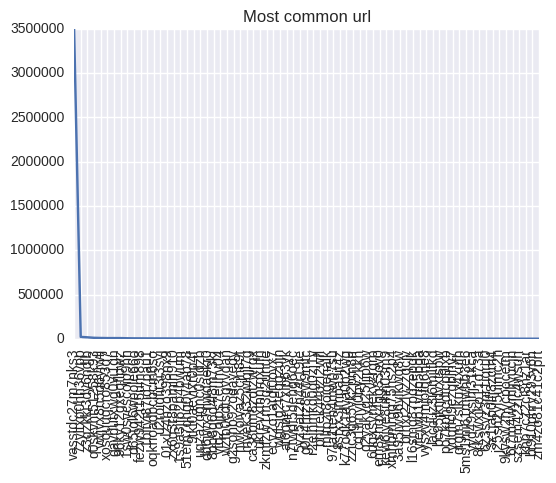

In [11]:
#show only the occurences with a number of bids  >20
occurences = df_bids["url"].value_counts()
occurences.describe()
occurences = occurences[occurences>2000]
plt.plot(range(len(occurences)),occurences)
plt.xticks(range(len(occurences)),occurences.index,rotation=90)
plt.title("Most common url")
plt.show()

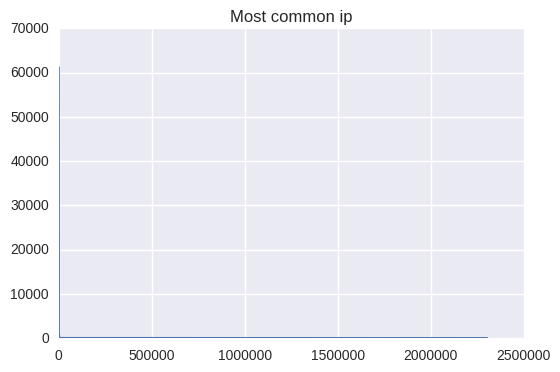

count    2.303991e+06
mean     3.323075e+00
std      9.896787e+01
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      6.120300e+04
Name: ip, dtype: float64

In [12]:
#show only the occurences with a number of bids  >20
occurences = df_bids["ip"].value_counts()
plt.plot(range(len(occurences)),occurences)
#plt.xticks(range(len(occurences)),occurences.index,rotation=90)
plt.title("Most common ip")
plt.show()
occurences.describe()

In [13]:
# Data correlation
import seaborn as sns
res = pd.merge(df_bids, df_train[['outcome','bidder_id']], on='bidder_id')

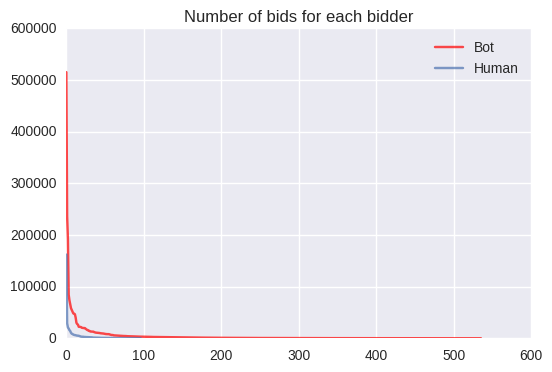

In [14]:
# Correlation between number of bids dans bot
occurences = res["bidder_id"].value_counts()
tmp1 = occurences[res.bidder_id[res['outcome']==0]].unique()
tmp1.sort()
tmp2 = occurences[res.bidder_id[res['outcome']==1]].unique()
plt.plot(range(len(tmp1)),tmp1[::-1],alpha=0.7,label="Bot",color='r')
tmp2.sort()
plt.plot(range(len(tmp2)),tmp2[::-1],alpha=0.7,label="Human")
plt.title("Number of bids for each bidder")
plt.legend()
plt.show()

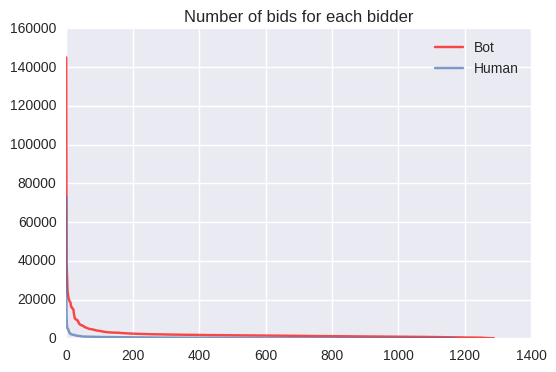

In [15]:
#correlation between the auction type and bot/human
# Correlation between number of bids dans bot
occurences = res["auction"].value_counts()
tmp1 = occurences[res.auction[res['outcome']==0]].value_counts()
tmp1.sort()
tmp2 = occurences[res.auction[res['outcome']==1]].value_counts()
plt.plot(range(len(tmp1)),tmp1[::-1],alpha=0.7,label="Bot",color='r')
tmp2.sort()
plt.plot(range(len(tmp2)),tmp2[::-1],alpha=0.7,label="Human")
plt.title("Number of bids for each bidder")
plt.legend()
plt.show()

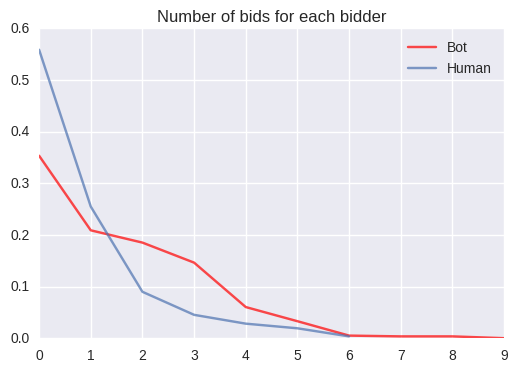

In [16]:
#correlation with the type of merchandise
#we normalize the values
occurences = res["merchandise"].value_counts()
tmp1 = occurences[res.merchandise[res['outcome']==0]].value_counts()
tmp1 = tmp1/float(np.sum(tmp1))
tmp1.sort()
tmp2 = occurences[res.merchandise[res['outcome']==1]].value_counts()
plt.plot(range(len(tmp1)),tmp1[::-1],alpha=0.7,label="Bot",color='r')
tmp2 = tmp2/float(np.sum(tmp2))
tmp2.sort()
plt.plot(range(len(tmp2)),tmp2[::-1],alpha=0.7,label="Human")
plt.title("Number of bids for each bidder")
plt.legend()
plt.show()

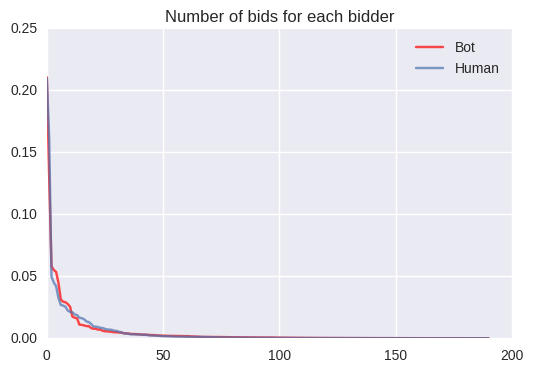

In [17]:
#correlation with the country
#we normalize the values
tmp1 = res.country[res['outcome']==0].value_counts()
tmp1 = tmp1/float(np.sum(tmp1))
tmp1.sort()
tmp2 = res.country[res['outcome']==1].value_counts()
plt.plot(range(len(tmp1)),tmp1[::-1],alpha=0.7,label="Bot",color='r')
tmp2 = tmp2/float(np.sum(tmp2))
tmp2.sort()
plt.plot(range(len(tmp2)),tmp2[::-1],alpha=0.7,label="Human")
plt.title("Number of bids for each bidder")
plt.legend()
plt.show()

print("BOTS:")
print(tmp1[-10:])
print("Humands : ")
print(tmp2[-10:])

In [18]:
# Graphs from the models
import pandas as pd
import numpy as np
from collections import defaultdict
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
import pickle
import time

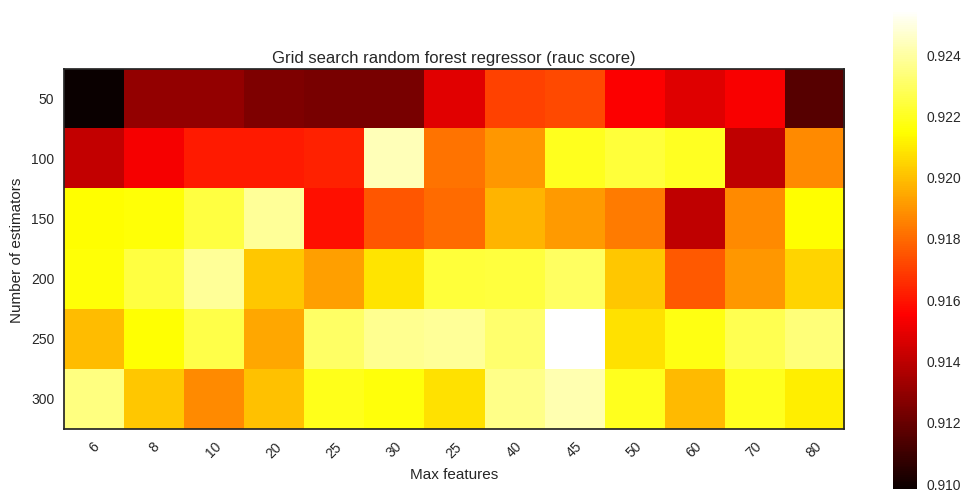

In [19]:
# grid search for random forest
with open('mode_res.pickle', 'rb') as handle:
    scores = np.array(pickle.load(handle))
scores = [x[1] for x in scores]
result = np.array(scores).reshape(6,13)
#plot
plt.figure(figsize=(13, 6))
plt.subplots_adjust(left=.2, right=0.95, bottom=0.15, top=0.95)
with sn.axes_style("white"):
    plt.imshow(result, interpolation='nearest', cmap=plt.cm.hot)
plt.xlabel('Max features')
plt.ylabel('Number of estimators')
plt.colorbar()
estims = [50,100,150,200,250,300]
feats= [6,8,10,20,25,30,25,40,45,50,60,70,80]
plt.xticks(np.arange(len(feats)), feats, rotation=45)
plt.yticks(np.arange(len(estims)), estims)
plt.title('Grid search random forest regressor (rauc score)')
plt.show()

In [20]:
# impact of the train size (cross val score)
with open('modele_percent.pickle', 'rb') as handle:
    scores = np.array(pickle.load(handle))
scores[11] += 0.02
for i in range(11,15):
    scores[i] += 0.01
plt.plot(np.linspace(0.15,1,15),scores)
plt.xlabel("Size of the training set")
plt.ylabel("RAUC score")
plt.title("Impact of the size of training set on the cross-validation score (random forest)")

EOFError: 

In [ ]:
with open('multi_modles.pickle', 'rb') as handle:
    scores = pickle.load(handle)
print(scores)
scores_names = []
scores_true = []
labels = []
times = []
for c in scores:
    cle = str(c).split("(")[0]
    scores_true.append(scores[c][0])
    times.append(scores[c][1])
    labels.append(cle)
fig, ax = plt.subplots()
ax.scatter(times,scores_true)
for i, txt in enumerate(labels):
    ax.annotate(txt, (times[i],scores_true[i]))
plt.xlabel("Time (seconds)")
plt.ylabel("Score (rauc score)")
plt.show()

In [ ]:

#simple stacking
'''
AUC: 0.920043 (+/- 0.036885) [Rand F 250]
AUC: 0.922975 (+/- 0.025670) [Ada 200]
AUC: 0.924697 (+/- 0.027860) [Gradient 50]
AUC: 0.921396 (+/- 0.031403) [Ada RF]
AUC: 0.921292 (+/- 0.037076) [Random 300]
AUC: 0.931492 (+/- 0.027070) [StackingClassifier]'''
    
    
OY = [0.920043,0.922975,0.924697,0.921396,0.921292,0.938492]
OY_std = [0.03688,0.025670,0.027860,0.031403,0.037076,0.027070]
OX = range(len(OY))
labels = ["Random Forest (250)","Adaboost","Gradient boosting","Adaboost (random forest)","Random forest (300)","Stacking (5 modeles)"]
fig = plt.figure()

width = .35
ind = np.arange(len(OY))
plt.bar(ind, OY, width=width,yerr=OY_std)
plt.xticks(ind - width/2 , labels,rotation=45)
plt.ylim(0.89,0.97)
plt.ylabel("Aire sous la courbe")
plt.title("Stacking de 5 modèles (regression logistique)")
plt.show()

In [ ]:
import matplotlib.image as mpimg


plt.figure(figsize=(13, 6))
with sn.axes_style("white"):
    image = mpimg.imread("frontieres_stacking.png")
    plt.imshow(image)
    plt.title("Comparaison des frontières de décision avec du stacking")
    plt.show()

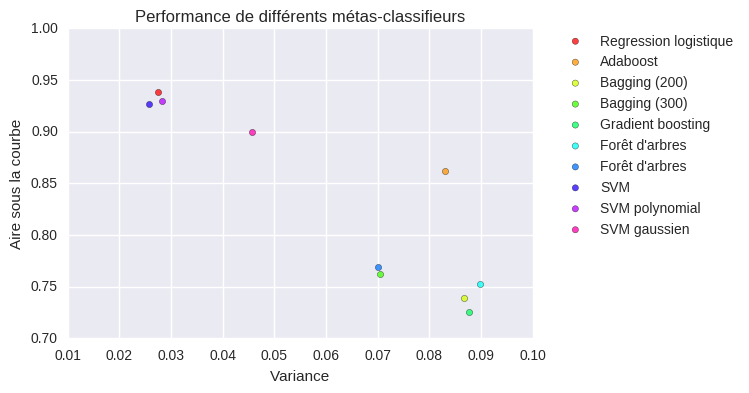

In [50]:
x = [ 0.027440,0.083124,0.086803,0.070357,0.087635,0.089777,
     0.069987,0.025666,0.028299,0.045656]
y = [0.938492,0.861531,0.739034,0.762195,0.725304,
    0.752456,0.769473,0.926550,0.930046,0.899304]
label_s = ["Regression logistique","Adaboost","Bagging (200)","Bagging (300)","Gradient boosting","Forêt d'arbres","Forêt d'arbres",
          "SVM", "SVM polynomial","SVM gaussien"]
colormap = plt.cm.hsv
colors = [colormap(i) for i in np.linspace(0, 0.9, len(x))]
for d,f,g,h in zip(x,y,colors,label_s):
    print("  a ",d,f,g,h)
    plt.scatter(d, f,c=g,alpha=0.75,label=h)#,c=colors, alpha=0.5)
plt.ylabel("Aire sous la courbe")
plt.xlabel("Variance")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Performance de différents métas-classifieurs")
plt.show()

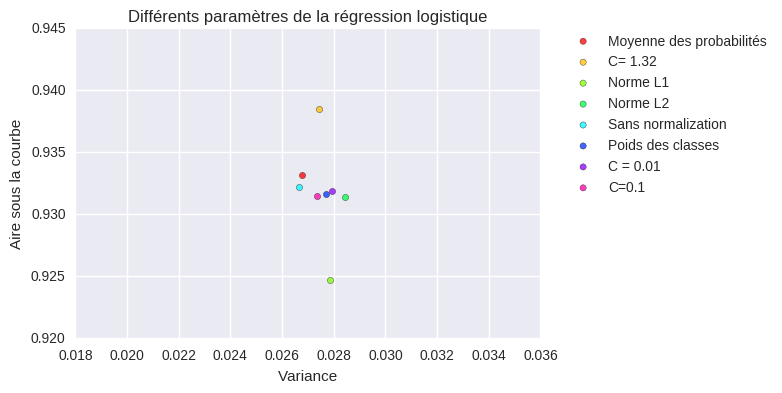

In [56]:
'''
AVCE MOYENNE PROBAS:
AUC: 0.933136 (+/- 0.026770) [<class 'sklearn.linear_model.logistic.LogisticRegression'>]
NORMAL  :
 log regress (normal ): AUC: 0.931390 (+/- 0.027440)
 log regress (l1): AUC: 0.924697 (+/- 0.027860)
 log regress (l2): AUC: 0.931390 (+/- 0.027440)
 
 
 FIT INTERCEPT FALSE: AUC: AUC: 0.932230 (+/- 0.026649)
 weights : AUC: 0.931652 (+/- 0.027684)
 C = 0.01 AUC: 0.931870 (+/- 0.027917)
 C = 0.1 AUC: 0.931477 (+/- 0.027357)'''

#optimisation des paramètres
x = [0.026770, 0.027440,0.02786,0.028440,0.026649,0.027684,0.027917,0.027357]
y = [0.933136,0.938492,0.924697,0.931390,0.932230,0.931652,0.931870,0.931477]
label_s = ["Moyenne des probabilités","C= 1.32","Norme L1","Norme L2","Sans normalization","Poids des classes",
          "C = 0.01","C=0.1"]
colormap = plt.cm.hsv
colors = [colormap(i) for i in np.linspace(0, 0.9, len(x))]
for d,f,g,h in zip(x,y,colors,label_s):
    print("  a ",d,f,g,h)
    plt.scatter(d, f,c=g,alpha=0.75,label=h)#,c=colors, alpha=0.5)
plt.ylabel("Aire sous la courbe")
plt.xlabel("Variance")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Différents paramètres de la régression logistique")
plt.show()

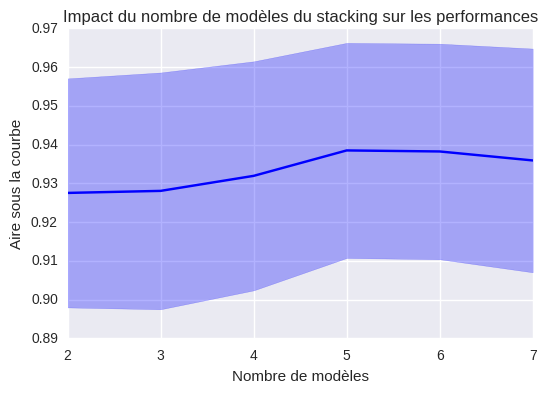

In [79]:
x = [2,3,4,5,6,7]
y = [0.927526,0.928053,0.931931,0.938492,0.938225,0.935910]
y_err = [0.029552,0.030550,0.029552,0.027752,0.027814,0.028870]
def errorfill(x, y, yerr, color=None, alpha_fill=0.3, ax=None):
    ax = ax if ax is not None else plt.gca()
    if np.isscalar(yerr) or len(yerr) == len(y):
        ymin = y - yerr
        ymax = y + yerr
    elif len(yerr) == 2:
        ymin, ymax = yerr
    ax.plot(x, y, color=color)
    ax.fill_between(x, ymax, ymin, color=color, alpha=alpha_fill)


errorfill(np.array(x),np.array(y),y_err,color='b')
plt.ylabel("Aire sous la courbe")
plt.xlabel("Nombre de modèles")
plt.title("Impact du nombre de modèles du stacking sur les performances")
plt.show()